<a href="https://colab.research.google.com/github/Ansonex/Image-Classification-Cat-and-Dog-/blob/main/ImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Install Dependencies and Setup

In [1]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# After executing the cell above, Drive
# files will be present in "/content/drive/My Drive".
!ls "/content/drive/My Drive/data"

cat  dog


In [3]:
import tensorflow as tf
import os    # use for joi path file 

## Upload image and run the image

In [4]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [5]:
data_dir = '/content/drive/MyDrive/data'

In [6]:
os.listdir(data_dir)

['cat', 'dog']

In [7]:
len(os.listdir("/content/drive/My Drive/data/cat"))

280

In [8]:
len(os.listdir("/content/drive/My Drive/data/dog"))

280

In [9]:
img = cv2.imread(os.path.join('/content/drive/My Drive/data','cat','cat107.jpeg'))

In [10]:
img.shape

(1500, 1000, 3)

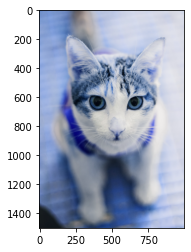

In [11]:
plt.imshow(img)

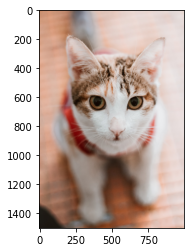

In [12]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [13]:
import numpy as np


## Resize the image 

In [14]:
data = tf.keras.utils.image_dataset_from_directory('/content/drive/My Drive/data',batch_size = 40)   # we can change the batch size at here 

Found 560 files belonging to 2 classes.


In [15]:
data_iterator = data.as_numpy_iterator() 

In [16]:
batch = data_iterator.next()

In [17]:
batch[0].min()

0.0

In [18]:
batch[0].max()

255.0

In [19]:
batch[0].shape

(40, 256, 256, 3)

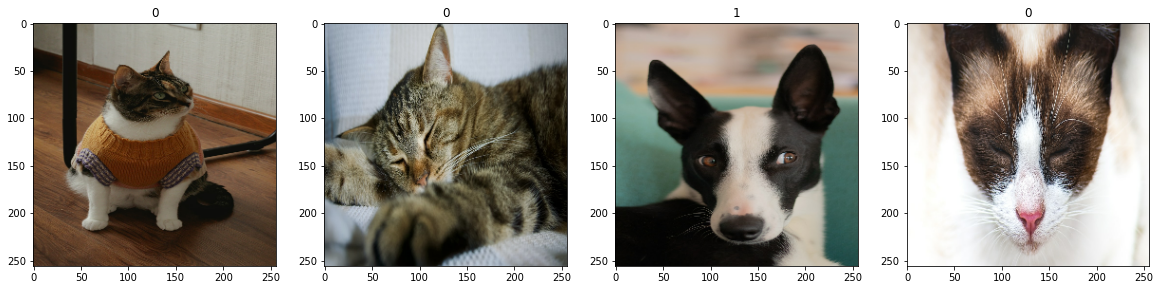

In [20]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

## 2. Preprocess Data

In [21]:
data = data.map(lambda x, y: (x/255, y))

x - image 
y - target variable 

In [22]:
scaled_iterator = data.as_numpy_iterator()

In [23]:
batch = scaled_iterator.next()

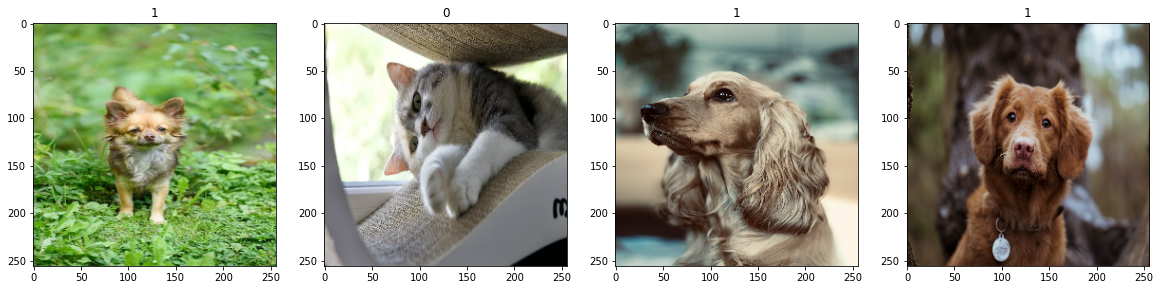

In [24]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(batch[1][idx])

## Split data

1 bacth have 40 image 

In [25]:
len(data)

14

In [26]:
train_size = int(len(data)*0.7)   # training set
val_size = int(len(data)*0.2)+1   # Validation set
test_size = int(len(data)*0.1)+1  # Test Set

In [27]:
train_size

9

In [28]:
val_size

3

In [29]:
test_size

2

In [30]:
train = data.take(train_size)         # take 9 bacth as a train data
val = data.skip(train_size).take(val_size)    # skip train and take the val_size ( 3 bacth) as a validation data
test = data.skip(train_size + val_size).take(test_size) # skip train data and val_size, and take test_size ( 2 bactch)

## Build model

In [31]:
from tensorflow.keras.models import Sequential   # ( one of the model for tensorflow/ keras - one input and one output )
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten# hidden layer 

Conv2D - 2D convolution layer 

In [32]:
model = Sequential()  # build neural network Frame

Add in the layer 

In [33]:
model.add(Conv2D(20,(3,3),1, activation = "relu", input_shape=(256,256,3)))       # 20 filter 
model.add(MaxPooling2D())

model.add(Conv2D(40,(3,3),1, activation = "relu"))                                # 40 filter
model.add(MaxPooling2D())

model.add(Conv2D(20,(3,3),1, activation = "relu"))                                # 20 filter 
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [34]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 20)      560       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 20)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 40)      7240      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 40)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 20)        7220      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 20)       0

## Train

In [36]:
logdir = '/content/.config/logs'

In [37]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [38]:
hist = model.fit(train, epochs=20, validation_data = val, callbacks=[tensorboard_callback])

Epoch 1/20
9/9 [==============================] - 27s 3s/step - loss: 1.1409 - accuracy: 0.4944 - val_loss: 0.6954 - val_accuracy: 0.5167
Epoch 2/20
9/9 [==============================] - 23s 2s/step - loss: 0.6924 - accuracy: 0.5389 - val_loss: 0.6840 - val_accuracy: 0.6833
Epoch 3/20
9/9 [==============================] - 22s 2s/step - loss: 0.6830 - accuracy: 0.5889 - val_loss: 0.6687 - val_accuracy: 0.5583
Epoch 4/20
9/9 [==============================] - 23s 2s/step - loss: 0.6632 - accuracy: 0.6139 - val_loss: 0.6426 - val_accuracy: 0.5750
Epoch 5/20
9/9 [==============================] - 23s 2s/step - loss: 0.6544 - accuracy: 0.6306 - val_loss: 0.6376 - val_accuracy: 0.7167
Epoch 6/20
9/9 [==============================] - 22s 2s/step - loss: 0.6367 - accuracy: 0.6750 - val_loss: 0.6413 - val_accuracy: 0.6000
Epoch 7/20
9/9 [==============================] - 22s 2s/step - loss: 0.6302 - accuracy: 0.6611 - val_loss: 0.5772 - val_accuracy: 0.7083
Epoch 8/20
9/9 [==================

In [39]:
hist.history

{'loss': [1.1408616304397583,
  0.6924383640289307,
  0.6830083727836609,
  0.6632025837898254,
  0.6543664336204529,
  0.6366949081420898,
  0.6302216649055481,
  0.5194317102432251,
  0.46270620822906494,
  0.4205998182296753,
  0.3983461260795593,
  0.3360976278781891,
  0.2874337136745453,
  0.2353612333536148,
  0.24444375932216644,
  0.20867513120174408,
  0.13766975700855255,
  0.12572771310806274,
  0.13082776963710785,
  0.07651311904191971],
 'accuracy': [0.49444442987442017,
  0.5388888716697693,
  0.5888888835906982,
  0.6138888597488403,
  0.6305555701255798,
  0.675000011920929,
  0.6611111164093018,
  0.7555555701255798,
  0.7916666865348816,
  0.8055555820465088,
  0.8083333373069763,
  0.8777777552604675,
  0.9027777910232544,
  0.9138888716697693,
  0.8999999761581421,
  0.9222221970558167,
  0.9611111283302307,
  0.9638888835906982,
  0.9555555582046509,
  0.9833333492279053],
 'val_loss': [0.6954296231269836,
  0.6839889883995056,
  0.6687248945236206,
  0.642565071

## Plot Performance

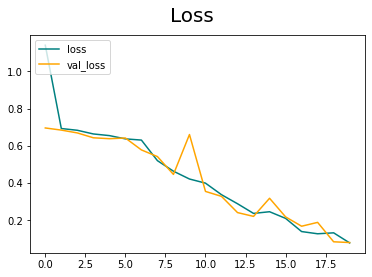

In [40]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'],color='orange', label= 'val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc="upper left")
plt.show()

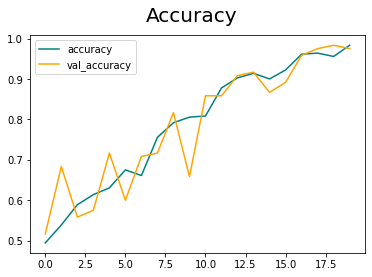

In [41]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'],color='orange', label= 'val_accuracy')
fig.suptitle('Accuracy',fontsize=20)
plt.legend(loc="upper left")
plt.show()

## Evaluation

In [42]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [43]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [44]:
for batch in test.as_numpy_iterator():
  X,y = batch
  yhat = model.predict(X)
  pre.update_state(y,yhat)
  re.update_state(y,yhat)
  acc.update_state(y,yhat)

2/2 [==============================] - 1s 105ms/step


In [45]:
print(f'Precision:{pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}')

Precision:1.0, Recall: 1.0, Accuracy: 1.0


## Test

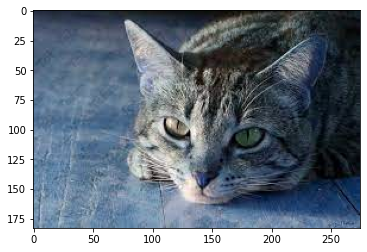

In [46]:
img_cat = cv2.imread('/content/drive/MyDrive/test cat 2.jpg')
plt.imshow(img_cat)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

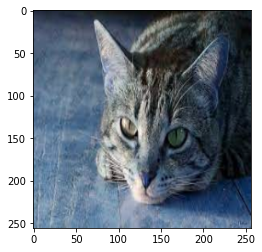

In [47]:
resize_cat = tf.image.resize(img_cat , (256,256))
plt.imshow(resize_cat.numpy().astype(int))
plt.show

In [48]:
yhat = model.predict(np.expand_dims(resize_cat/255,0))

1/1 [==============================] - 0s 36ms/step


In [49]:
yhat

array([[6.335269e-05]], dtype=float32)

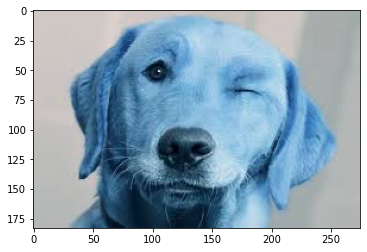

In [50]:
img_dog = cv2.imread('/content/drive/MyDrive/test dog 1.jpg')
plt.imshow(img_dog)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

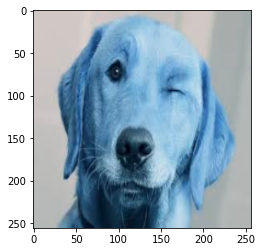

In [51]:
resize_dog = tf.image.resize(img_dog , (256,256))
plt.imshow(resize_dog.numpy().astype(int))
plt.show

In [52]:
yhat = model.predict(np.expand_dims(resize_dog/255,0))

1/1 [==============================] - 0s 31ms/step


In [53]:
yhat

array([[0.977649]], dtype=float32)

## Save Model 

In [81]:
from tensorflow.keras.models import load_model

In [82]:
model.save(os.path.join('models','catdogmodel.h5'))